<h1 style="font-size: 200%;color: darkgreen; font-weight: bold; text-align:center">Numerical Simulation Laboratory 2021</h1>

<p style="text-align:center"><b>Author:</b> Giacomo Riccardo Hvaring</p>

    
---

    
# 2. Monte Carlo integration and random walks

    
## exercise 2.1 (monte carlo integration)

Compute the following 1D integral via Monte Carlo methods
    
$$I = \frac{\pi}{2}\int_0^1 \cos\left(\frac{\pi x}{2}\right) dx = 1$$
    
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<p class="assignement"> Plot your estimation of $I$ together with its uncertainty as a function of the number of blocks, $N$, calculated with a large number of throws $M$ (e.g. $M\ge 10^4$).</p>
    
### my solution

In [1]:
from libsim import *                        # module containing some handy functions for the labs

results_directory += "lab_02/"              # where to look for the data
HTML(custom_css())                          # custom notebook appearance (do not suppress output of this cell)

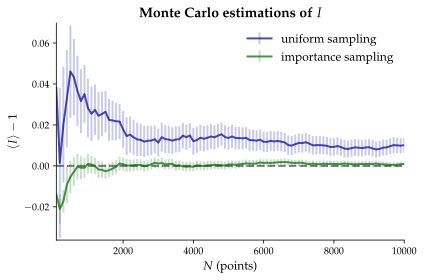

In [2]:
title = "Monte Carlo estimations of $I$"
xlabel = "$N$ (points)"
ylabel = "$\langle I\\rangle - 1$"

fig, ax = plt.subplots()
set_labels(ax, title, xlabel, ylabel)

methods = ["uniform", "importance"]
colors = ["darkblue", "darkgreen"]
exp_y = 1

for method, color in zip(methods, colors):
    file = results_directory + method + "_integral.dat"
    estimation_plot(ax, file, expected_y=exp_y, label=method + ' sampling', color=color, alpha=.7)

ax.legend();

## exercise 2.2 (random walk in 3D)

Simulate a 3D random walk in:

1. a cubic lattice with lattice constant $a=1$, where at each discrete time step the walker makes a forward or backward step of equal length $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$;
2. the continuum, where at each discrete time step the walker makes a step of equal length $a$ along a **random direction**, obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$.
    
<p class="remark"> Careful with the sampling of the angles, because for a uniform solid angle $\Omega=(\theta,\phi)$, $\phi$ is uniformly distributed in $[0,2\pi]$, and $\theta$ is distributed in $[0,\pi]$ with weight $p(\theta) = \frac{1}{2}\sin(\theta)$.</p>

Repeat many times (e.g. say $10^4$) the simulation always starting at the origin, for both cases use $a=1$.

<p class="assignement">Plot the quantity $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as functions of the steps $N\in [0,100]$.</p>
    
### my solution

In [3]:
from scipy.optimize import curve_fit

def square_root(x, k):
    'fitting function'
    return k * np.sqrt(x) # assumed to pass through zero

def line(x, m, q):
    return m * x + q

def compare_rws(axes, filenames, titles, xlabel, ylabels):
    'produce a double plot to compare the random walk results'
    for ax, filename, title, ylabel in zip(axes, filenames, titles, ylabels):
        # load data
        data = np.loadtxt(results_directory + filename)
        y = data[:,0]
        sigma = data[:,1]
        final_sigma = sigma[-1]
        # fit
        x = np.arange(y.size)
        shift = 2   # the origin and first step have zero uncertainty, thus are not used in the fit
        popt, pcov = curve_fit(square_root, x[shift:], y[shift:], sigma=sigma[shift:])
        # plot
        ax.plot(x, square_root(x, *popt), c='k', lw=2, label='fit of $k\sqrt N$')
        ax.errorbar(x, y, yerr=sigma, fmt='o', ms=4, mfc='white', label='simulation');
        # plot settings
        set_labels(ax, title, xlabel, ylabel)
        ax.text(.78, .65, f'$k_{{\\rm fit}} = {popt[0]:.3f}$', transform=ax.transAxes, size=12)
        ax.text(.78, .34, f'$\\sigma_{{\\rm end}} = {final_sigma:.3f}$', transform=ax.transAxes, size=12)
        ax.legend(loc="center right");

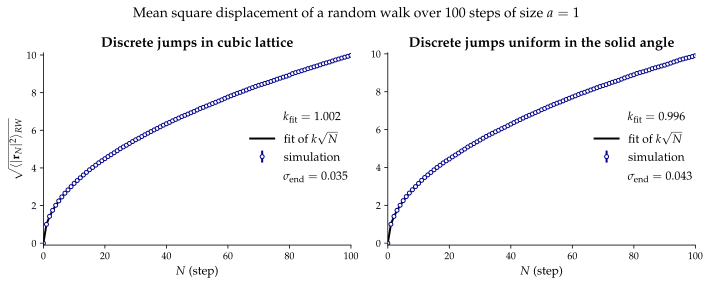

In [4]:
filenames = ["discrete_rw.dat", "continuous_rw.dat"]
titles = ["Discrete jumps in cubic lattice", "Discrete jumps uniform in the solid angle"]
xlabel = "$N$ (step)"
ylabels = ["$\sqrt{\langle |\mathbf{r}_N|^2 \\rangle_{RW}}$", ""]

fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle("Mean square displacement of a random walk over $100$ steps of size $a=1$")
compare_rws(ax, filenames, titles, xlabel, ylabels);

<span class="remark"> you could try to fit both results with a function like $f(N)=k\sqrt{N}$.
    Do your results indicate a diffusive behavior?</span>

Yes they do!